In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline

여기서는 다층 퍼셉트론(Multilayer Perceptions, MLP)를 가지고 간단한 분류와 회귀를 하는 것만 다룸

MLP는 기본 feed-forward NN, 혹은 그냔 신경망(NN)이라 불리운다

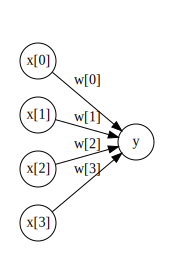

In [2]:
mglearn.plots.plot_logistic_regression_graph()

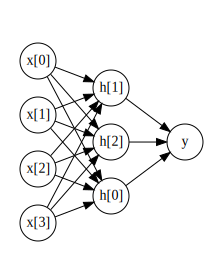

In [3]:
mglearn.plots.plot_single_hidden_layer_graph()

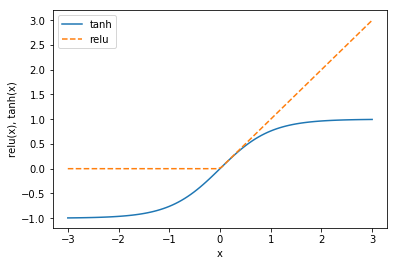

In [4]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

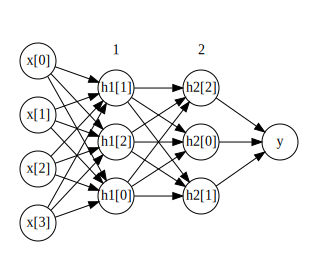

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()

신경망 튜닝

two-moon 데이터셋에 MLPClassifier를 적용하는 예

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

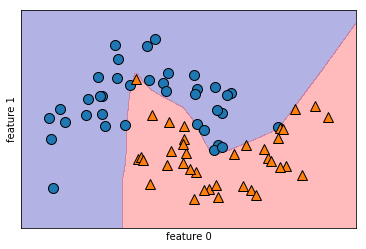

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1");

그림에서 버듯이 신경망은 비선형적이지만 비교적 매끄러운 결정 경계를 만들었다

히든 Unit의 수;  신경망 튜닝의 첫 스텝이다.

MLP는 기본값으로 은닉 유닛 100개를 사용하는데... 이런 작은 데이터셋은 과분한 크기이다.
은닉유닛의 개수를 낮추어 보자, 즉 모델의 복잡도를 낮추어 보자

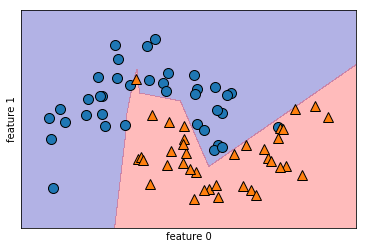

In [8]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1");

여전히 좋은 결과가 나온다.

그러나 히든 유닛의 수가 줄어 선이 조금 더 가파러졌다.

여기에 10개의 히든 유닛을 가진 히든 레이어(hidden layer)를 하나 더 추가해 보자

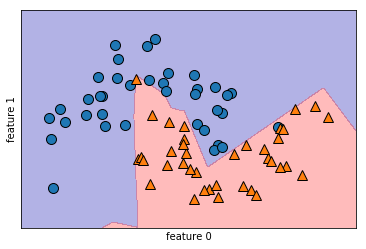

In [9]:
# 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1");

활성함수 매개변수: 기본값인 ReLu에서 tanh로 바꾸어 보자(더 부드러워 진다)

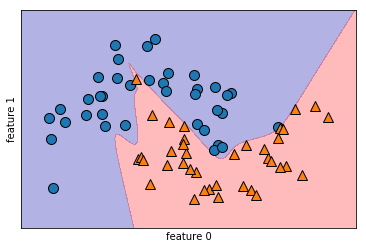

In [10]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1");

alpha 매개 변수 : 릿지 회귀와 선형 분류기에서 한것 처럼 L2 패널티를 사용해 가중치를 0에 가깝게 감소

alpha 매개 변수의 기본값은 0.0001로 규제를 거의 가하지 않는 상태인데...

two-moon 데이터셋에 히든 유닛이 각각 10개와 100개인 은닉층 2개를 만들고 서로 다른 alpha값이 모델에 미치는 영향을 알아보자

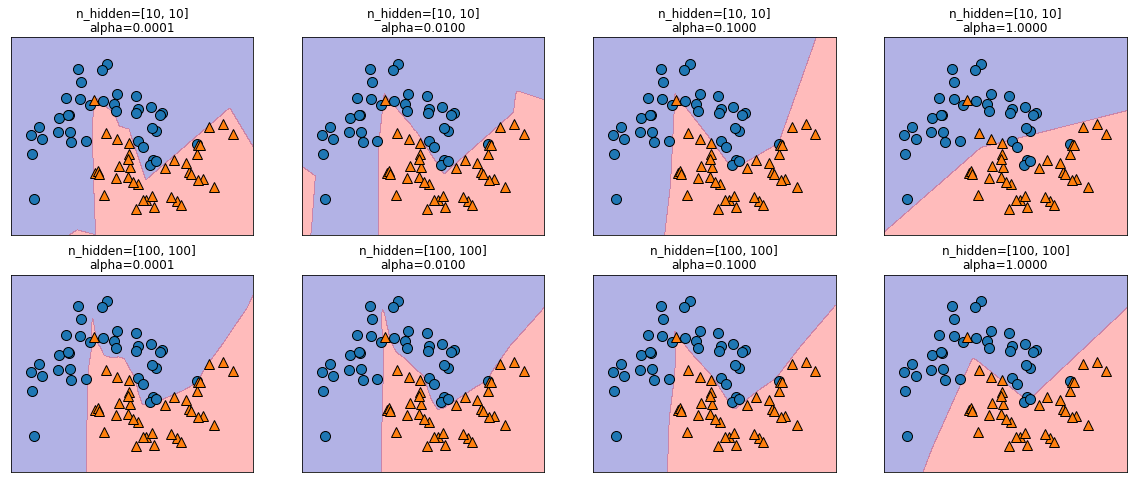

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

random_state 매개 뱐수가 미치는 영향을 알아보자

신경망에서는 학습을 시작하기 전에 가중치를 무작위로 설정하여 이 무작위한 초기화 모델의 학습에 영향을 준다.
따라서 다른 매개 변수가 똑 같다면 random_state 의 출발 숫자가 모델에 영향을 준다

신경망이 크고 복잡도도 적절하면 영향은 크지는 않지만 항상 기억하고 있어야 한다.

아래의 그림의 예는 매개 변수는 같고 random_state 가 다를 때 어떤 영향을 줄 수 있는 지에 대한 것

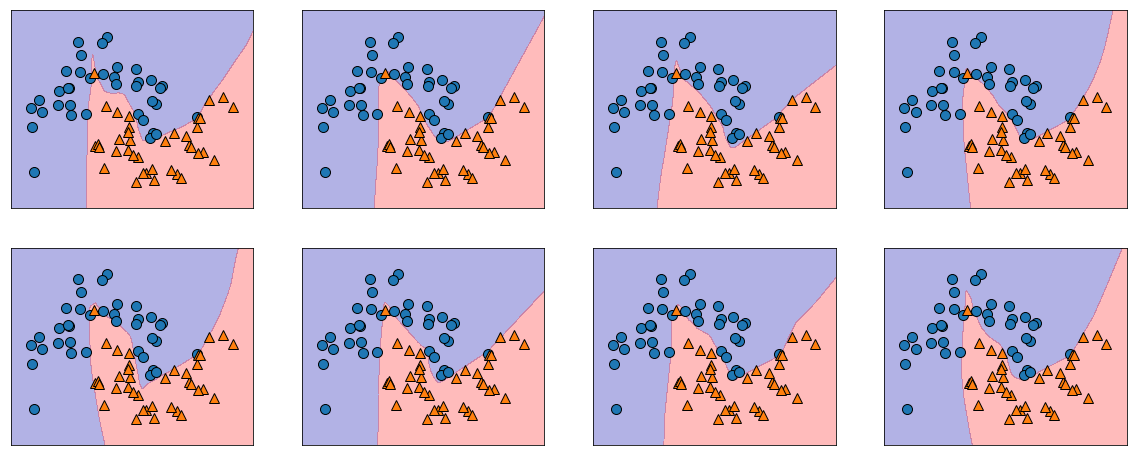

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [14]:
print("유방암 데이터의 특성별 최대값:\n{}".format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최대값:
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Traning Accy: {:.2f}".format(mlp.score(X_train, y_train)))
print("Test Accy: {:.2f}".format(mlp.score(X_test, y_test)))

Traning Accy: 0.91
Test Accy: 0.88


데이터 스케일 맞추기

위의 예에서 보는 것처럼 결과가 MLP에서 아주 뛰어나지는 않습니다. 데이터 스케일 영향 입니다.

따라서 모든 입력 특성을 평균은 0, 분산은 1이 되도록 정규화 변형을 하는 것이 좋습니다.

3장에서 이를 자동적으로 처리해 주는 StandardScaler를 배우겠지만 여기서는 직접 코딩해 보겠습니다.

In [16]:
# 훈련 세트 각 특성의 평균을 계산합니다
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산합니다
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1 인 데이터로 변환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 합니다
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Traning Accy: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test Accy: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Traning Accy: 0.991
Test Accy: 0.965


D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


스케일을 조정하니 결과가 매우 좋아 졌습니다.

하지만 경고가 나오는데...

이는 solver 매개 변수의 기본값인 adam 알고리즘에 관련된 것으로 반복 횟수를 늘리라는 경고 입니다.

ADAM(adaptive moment estimation) 알고리즘

경사 하강법의 학습률(learning rate) 매개 변수를 학습이 반볻됨에 따라 조정해 가는 알고리즘 중 하나임.

MLPClassifier와 MLPRegressor의 solver 매개변수 기본값이 adam 입니다.

max-iter 매개변수 : 기본값은 200 횟수인데 이를 1000으로 늘려 보겠습니다.

In [17]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Traning Accy: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test Accy: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Traning Accy: 0.993
Test Accy: 0.972


하지만 훈련 세트와 테스트 세트간의 점수 차가 큼으로 과대 적합일 수 있으니 L2 규제를 위하여 alpha 값을 올려 규제를 강화해 보도록 하겠습니다

In [18]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Traning Accy: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test Accy: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Traning Accy: 0.988
Test Accy: 0.972


신경망의 모델은 선형이나 결정트리 보다 복잡한데...
모델의 가중치를 확인하여 무엇이 중점적으로 학습되었는지 알 수 있다.

가중치 히트맵(heat map)을 시각화 해 보면 밝은 색은 가중치가 큰 양수라는 의미이고
어두운 색은 가중치가 음수값을 나타냅니다.

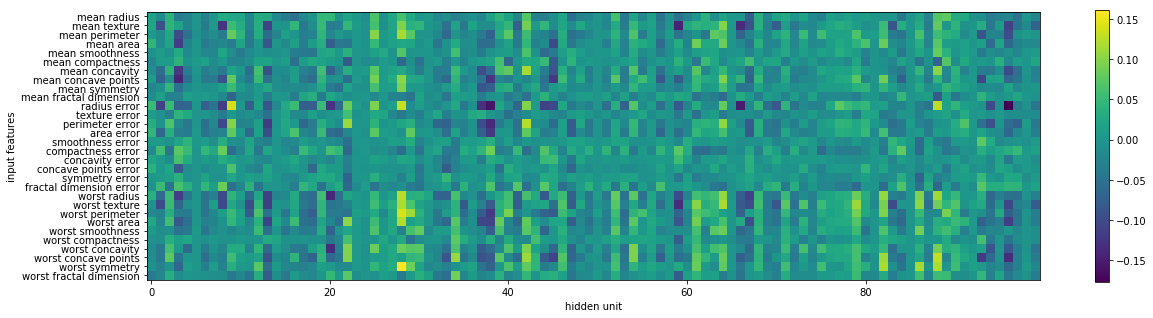

In [24]:
# 유방암 데이터세트로 학습시킨 신경망의 첫번쨰 층의 히트맵

plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("hidden unit")
plt.ylabel("input features")
plt.colorbar();

In [20]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [21]:
import pandas as pd
df_mlp = pd.DataFrame(mlp.coefs_[0], index=cancer.feature_names)
df_mlp.T.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.019389,0.023808,0.005263,0.044370,-0.002766,-0.020734,-0.008083,0.009191,-0.022485,-0.012693,...,0.038267,-0.005292,-0.018268,0.025622,0.007136,-0.005945,-0.012534,-0.009533,-0.004177,-0.038504
1,-0.014212,-0.092634,-0.016467,-0.011789,0.009137,0.008285,-0.054108,-0.070976,-0.008989,0.013415,...,-0.058682,-0.102749,-0.025057,-0.022397,-0.009331,-0.007680,-0.039581,-0.039604,-0.027283,-0.020939
2,0.041743,0.043143,0.025511,0.020542,-0.005378,0.009084,0.042245,-0.009328,0.046367,-0.028426,...,0.054928,0.052990,0.034537,0.057235,-0.007205,0.036841,0.060230,0.075648,-0.001495,0.035140
3,-0.034727,0.019641,-0.098473,-0.115045,0.029957,0.042089,-0.120399,-0.140406,-0.051081,-0.026806,...,-0.116052,-0.064763,-0.034835,-0.081360,-0.048688,0.014678,0.004489,-0.045283,-0.064021,-0.009208
4,-0.023830,-0.025956,-0.049963,-0.024050,-0.014603,-0.004812,-0.032387,-0.053538,-0.012960,0.014069,...,-0.041276,-0.006971,-0.037532,-0.053496,-0.039870,0.023483,-0.060391,0.001148,0.011696,0.001459


In [22]:
df_mlp.T.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.000853,-0.000987,0.000246,-0.002674,0.001337,0.000161,-0.004698,-0.006990,0.002384,-0.006155,...,-0.002460,-0.001192,-0.000187,-0.002665,0.002122,0.003144,0.004222,-0.004267,0.008651,-0.000784
std,0.030281,0.047733,0.041817,0.037068,0.023974,0.028120,0.042351,0.047768,0.027909,0.023908,...,0.055196,0.057142,0.047857,0.048565,0.038039,0.024126,0.046155,0.053573,0.041252,0.030368
min,-0.074225,-0.142802,-0.098473,-0.115045,-0.057889,-0.082478,-0.120399,-0.140406,-0.086326,-0.082271,...,-0.139024,-0.134668,-0.121424,-0.114551,-0.075637,-0.074401,-0.132862,-0.132069,-0.067700,-0.079935
25%,-0.021059,-0.025572,-0.024137,-0.024424,-0.010685,-0.010961,-0.031395,-0.035173,-0.013216,-0.022784,...,-0.043319,-0.040159,-0.035098,-0.034048,-0.023125,-0.007786,-0.028717,-0.040254,-0.019461,-0.019433
50%,-0.000045,0.002689,-0.002125,-0.000537,-0.000871,0.000968,-0.005257,-0.005885,0.002264,-0.001398,...,0.000602,0.000377,-0.000039,0.000296,-0.002990,0.000674,0.001642,-0.001566,0.001025,-0.002854
75%,0.019488,0.033177,0.021028,0.020643,0.013446,0.016376,0.017650,0.023188,0.015536,0.010093,...,0.036408,0.038679,0.033287,0.027762,0.024970,0.015129,0.035303,0.027088,0.022598,0.013243
max,0.078133,0.098030,0.117484,0.086214,0.081166,0.071436,0.116086,0.104016,0.094226,0.048136,...,0.126602,0.120248,0.140437,0.122502,0.089837,0.076510,0.096964,0.128846,0.161455,0.089244


모든 은닉유닛에서 작은 가중치를 가진 특성은 모델에 덜 중요하다고 추론 가능함

종합 정리

(1) 데이터 전처리가 중요함 = 데이터 스케일 조정 등 필요함
- 모든 특성이 같은 의미를 가진 동질의 데이터에서잘 작동한다.
- 다른 종류의 특성을 가진 데이터라면트리기반 모델이 더 적합하다

(2) 가장 중요한 매개 변수는 은닉층 갯수와 은닉층의 유닛 수이다.
- 신경망 모델의 복잡도는 학습된 가중치의 수 혹은 계수(coefs)의 수인데..
- 이는 은닉층의 수와 은닉층 유닛수의 곱과 은닉층과 출력층 사의의 가중치의 수의 합이다.

(3) L2 규제 = alpha 의 값을 1에 가깝게 만들어 규제를 강화 할 수 있다

(4) 활성화 함수를 통하여 비선형성 이슈를 조절할 수 있다.

(5) solver 매개 변수를 통한 모델의 학습 시키는 방법 혹은 매개 젼수 학습에 사용하는 알고리즘 지정 가능
- ADAM : 기본값인데... 데이터 스케닝레 조금 민감함
- lbfgs : 안정적이지만 규모가 큰 모델이나 대량의 데이터셋에서는 성는이 우려됨
- sgd : 고급옵션인데... 다른 여러 매개 변수와 함께 튜닝을 잘 하면 좋은 결과를 얻을 수 있다.


(주의 사항)

fit()는 적용 시 마다 모델을 새로 만듭니다.

sci-kit learn 에서는 fit()을 호출 할 때 마다 이전에 학습한 것을 초기화 합니다.

solver 매개 변수를 adam 혹은 sgd 로 하고 미니 배치를 돌려 점진적으로 학습을 할 경우 이전에 학습된 것을 유지 하여야 하는데... 이때는 fit() 대신 partial_fit()을 사용합니다